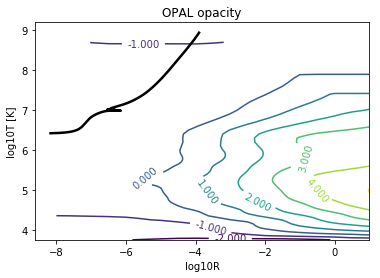

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

##################################
# Read opal table                                                  #
##################################
df = pd.read_table('tab56.dat', header = None)
optab_tmp = np.array(df[0])[1:]
optab = []
for dmy in optab_tmp:
    ddmy = dmy.split()
    ddmy = [float(x) for x in ddmy]
    optab.append(ddmy)
optab = np.array(optab)

log10T = optab[:, 0]
kappa = np.delete(optab, obj=0, axis=1)
log10R = np.linspace(-8.0,1.0,19) 

# Based on the OPAL convention :
#
# R=density[g/cm**3]/T6**3, T6=1.e-6*T[degrees]
#    log(T) range: 70 values from 3.75 to 8.70
#    log(R) range: 19 values from -8.0 to +1.0

##################################

##################################
# Read wind profile                                               #
##################################
df = pd.read_table('../inshot.dat', header = None)

inshot_tmp = np.array(df[0])
inshot = []
for dmy in inshot_tmp:
    ddmy = dmy.split()
    ddmy = [float(x) for x in ddmy]
    inshot.append(ddmy)
inshot = np.array(inshot)

rw = inshot[:,5]
Tw = inshot[:, 7]
rhow = inshot[:, 8]
Rw = rhow/(Tw/1.0e6)**3. 
##################################

##################################
# Plot                                                                     #
##################################
fig, ax = plt.subplots()
CS = ax.contour(log10R, log10T, kappa)
ax.clabel(CS, inline=1, fontsize=10)
ax.plot(np.log10(Rw),np.log10(Tw), linewidth = 2.5, c = 'k')
plt.xlabel('log10R')
plt.ylabel('log10T [K]')
plt.title('OPAL opacity')
plt.show()


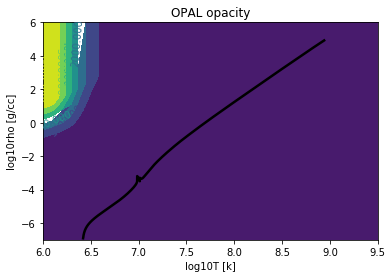

In [84]:
##################################
# Read fitted opal opacity                                   #
##################################
df = pd.read_table('kappa_fit.dat', header = None)

optab_tmp = np.array(df[0])
optab = []
for dmy in optab_tmp:
    ddmy = dmy.split()
    ddmy = [float(x) for x in ddmy]
    optab.append(ddmy)
optab = np.array(optab)

log10rho = optab[:, 0]
kappa_fit = np.delete(optab, obj=0, axis=1)
log10T = np.linspace(6.0,9.5,99) 

##################################
# Plot                                                                     #
##################################
fig, ax = plt.subplots()
CS = ax.contourf(log10T, log10rho,kappa_fit)
ax.clabel(CS, inline=1, fontsize=10)
ax.plot(np.log10(Tw),np.log10(rhow), linewidth = 2.5, c = 'k')
plt.xlabel('log10T [k]')
plt.ylabel('log10rho [g/cc]')
plt.title('OPAL opacity')
plt.show()

In [46]:
kappa_fit, log10T, log10rho

(array([[2.041738e-01, 2.041455e-01, 2.041173e-01, ..., 2.039047e-01,
         2.037963e-01, 2.036880e-01],
        [2.041738e-01, 2.041455e-01, 2.041173e-01, ..., 2.039047e-01,
         2.037963e-01, 2.036880e-01],
        [2.041738e-01, 2.041455e-01, 2.041173e-01, ..., 2.039047e-01,
         2.037963e-01, 2.036880e-01],
        ...,
        [6.441693e+03, 6.449723e+03, 6.457764e+03, ..., 2.039047e-01,
         2.037963e-01, 2.036880e-01],
        [6.441693e+03, 6.449723e+03, 6.457764e+03, ..., 2.039047e-01,
         2.037963e-01, 2.036880e-01],
        [6.441693e+03, 6.449723e+03, 6.457764e+03, ..., 2.039047e-01,
         2.037963e-01, 2.036880e-01]]),
 array([6.        , 6.00300601, 6.00601202, 6.00901804, 6.01202405,
        6.01503006, 6.01803607, 6.02104208, 6.0240481 , 6.02705411,
        6.03006012, 6.03306613, 6.03607214, 6.03907816, 6.04208417,
        6.04509018, 6.04809619, 6.0511022 , 6.05410822, 6.05711423,
        6.06012024, 6.06312625, 6.06613226, 6.06913828, 6.0721442